# Medium Article - Build Your First Neural Network
https://medium.com/intuitive-deep-learning/build-your-first-neural-network-to-predict-house-prices-with-keras-eb5db60232c


In [0]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt

Add seeding models to generate reproducable results for training.

In [0]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

# Step 1 - Loading Data

In [29]:
from google.colab import files
upload = files.upload()

Saving housepricedata.csv to housepricedata (2).csv


In [30]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


# Step 2 - Cleaning Data

Convert panda to array.

In [31]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [0]:
x = dataset[:,0:10]
y = dataset[:, 10]

Normalize x array to improve training.

In [33]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_x = min_max_scaler.fit_transform(x)
scaled_x

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

# Step 3 - Test / Train Data

Last step in processing data which involves splitting dataset into a training set, a validation set and test set.

We now have a total of six variables for our datasets we will use:

*   x_train (10 input features, 70% of full dataset)
*   x_val (10 input features, 15% of full dataset)
*   x_test (10 input features, 15% of full dataset)
*   y_train (1 label, 70% of full dataset)
*   y_val (1 label, 15% of full dataset)
*   y_test (1 label, 15% of full dataset)

In [34]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(scaled_x, y, test_size = 0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size = 0.5)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Step 4 - Building and Training The Neural Network

In words, we want to have these layers:

*   Hidden layer 1: 32 neurons, ReLU activation
*   Hidden layer 2: 32 neurons, ReLU activation
*   Output Layer: 1 neuron, Sigmoid activation

![alt text](https://miro.medium.com/max/1366/1*n-SIfloaWQxvQ5XMgnKmRA.png)

In [0]:
# specifying our sequential model.
model = tf.keras.Sequential([tf.keras.layers.Dense(32, activation = 'relu', input_shape = (10,)),
                    tf.keras.layers.Dense(32, activation = 'relu'),
                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

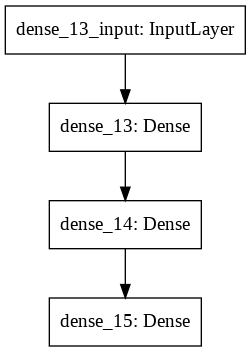

In [36]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [0]:
# configure the model
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [38]:
hist = model.fit(x_train, y_train,
                 batch_size = 32, epochs = 100,
                 validation_data = (x_val, y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5695 - val_loss: 0.6801 - val_accuracy: 0.7489
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.7603 - val_loss: 0.6733 - val_accuracy: 0.7032
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.7006 - val_loss: 0.6677 - val_accuracy: 0.6895
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6869 - val_loss: 0.6626 - val_accuracy: 0.6712
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6605 - val_loss: 0.6573 - val_accuracy: 0.6895
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.7123 - val_loss: 0.6519 - val_accuracy: 0.6941
Epoch 8/100
3

In [39]:
model.evaluate(x_test, y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.9087


0.9086757898330688

# Step 4 - Analyzing Loss and Accuracy

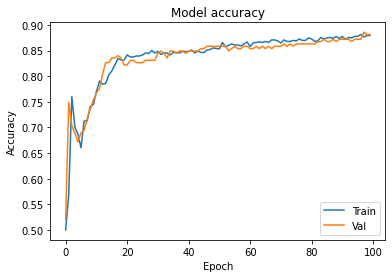

In [40]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

## Step 5 - Simulating Overfitting

Introduce regularization to formulate a neural network which badly overfits. This is done by substantially increasing the number of neurons in each layer, and adding extra hidden layers to the model.

In [41]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

hist_2 = model_2.fit(x_train, y_train,
                     batch_size = 32, epochs = 100,
                     validation_data = (x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4779 - accuracy: 0.7789 - val_loss: 0.3311 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3586 - accuracy: 0.8483 - val_loss: 0.2987 - val_accuracy: 0.8767
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3157 - accuracy: 0.8669 - val_loss: 0.3295 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2916 - accuracy: 0.8748 - val_loss: 0.3361 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2690 - accuracy: 0.8924 - val_loss: 0.2302 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2637 - accuracy: 0.8982 - val_loss: 0.2557 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2620 - accuracy: 0.8885 - val_loss: 0.2303 - val_accuracy: 0.8950
Epoch 

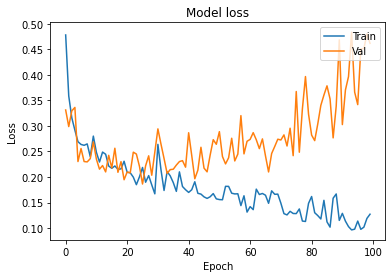

In [42]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

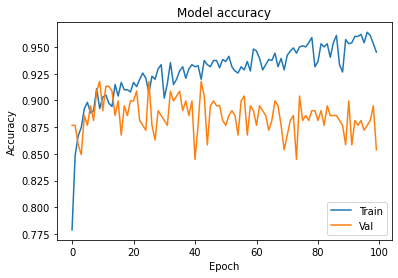

In [43]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Step 6 - Reducing Overfitting

There are three ways to reduce over fitting:

1. L2 Regularization: works by penalizing extremely large parameters within a model. Adds a penalty to the loss function which is squared value of the parameters (scaled by a constant).


2. Early Stopping: the loss function follows a u shaped curve, so this method involves taking the model at the bottom of the U-Shaped curve.

3. Dropout: during training of the model, you can randomly assign some of the models to drop out at each step with a set probability. Introduces randomness to the training to prevent over-reliance on key neurons.

L2 Regularization and Dropout will be used to resolve the overfitting from Model 2. A probability of 30% will be applied to the Neutron Dropout, and we will apply a constant of 0.01 to the L2 Regularization.

In [0]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [45]:
model_3.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
hist_3 = model_3.fit(x_train, y_train,
                     batch_size=32, epochs=100,
                     validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 1s 42ms/step - loss: 14.2254 - accuracy: 0.6027 - val_loss: 3.9142 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 1.6670 - accuracy: 0.8356 - val_loss: 0.6692 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.5890 - accuracy: 0.8532 - val_loss: 0.5000 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 39ms/step - loss: 0.5121 - accuracy: 0.8513 - val_loss: 0.5273 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4960 - accuracy: 0.8699 - val_loss: 0.4546 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4914 - accuracy: 0.8748 - val_loss: 0.4607 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4904 - accuracy: 0.8748 - val_loss: 0.4383 - val_accuracy: 0.8950
Epoch

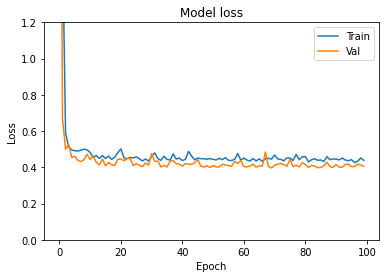

In [49]:

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.ylim(top = 1.2, bottom = 0)
plt.show()

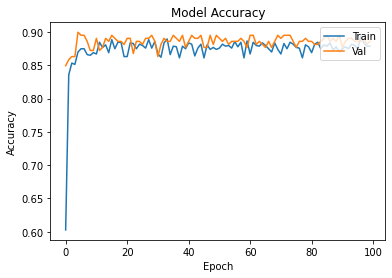

In [53]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()